In [73]:
import numpy as np
import math

In [74]:
with open('initialStateDistribution.txt') as f:
    content = f.readlines()
content = [line.strip() for line in content]
pi = np.array(list(map(float,content)))

In [75]:
with open('transitionMatrix.txt') as f:
    content = f.readlines()
content = [line.strip() for line in content]
A = np.array([list(map(float,d)) \
              for d in [line.split(' ') for line in content]])

In [76]:
with open('emissionMatrix.txt') as f:
    content = f.readlines()
content = [line.strip() for line in content]
B = np.array([list(map(float,d)) \
              for d in [line.split(' ') for line in content]])

In [77]:
with open('observations.txt') as f:
    content = f.readlines()
content = [line.strip() for line in content]
O = np.array(list(map(int,content[0].split(' '))))

In [78]:
V = np.array([[0.0]*len(O)]*len(A))
bp = np.array([[0]*len(O)]*len(A))

In [79]:
import math
for i in range(len(B)):
    V[i][0] = math.log(pi[i]*B[i][O[0]])
    bp[i][0] = -1

In [106]:
for t in range(1,len(O)):
    for s in range(len(B)):
        log_b = math.log(B[s][O[t]])
        vec_comp = V[:,t-1] + np.log(A[:,s]) + log_b
        V[s][t] = np.max(vec_comp)
        bp[s][t] = np.argmax(vec_comp)

In [148]:
S = []
T = len(O)-1
max_ll = np.sort(V[:,T])
for ll in reversed(max_ll):
    s = [list(V[:,T]).index(ll)]
    backpointer = bp[s[0]][T]
    t = T-1
    while backpointer != -1:
        s.append(bp[backpointer][t])
        backpointer = s[len(s)-1]
        t = t-1
    S.append(s)

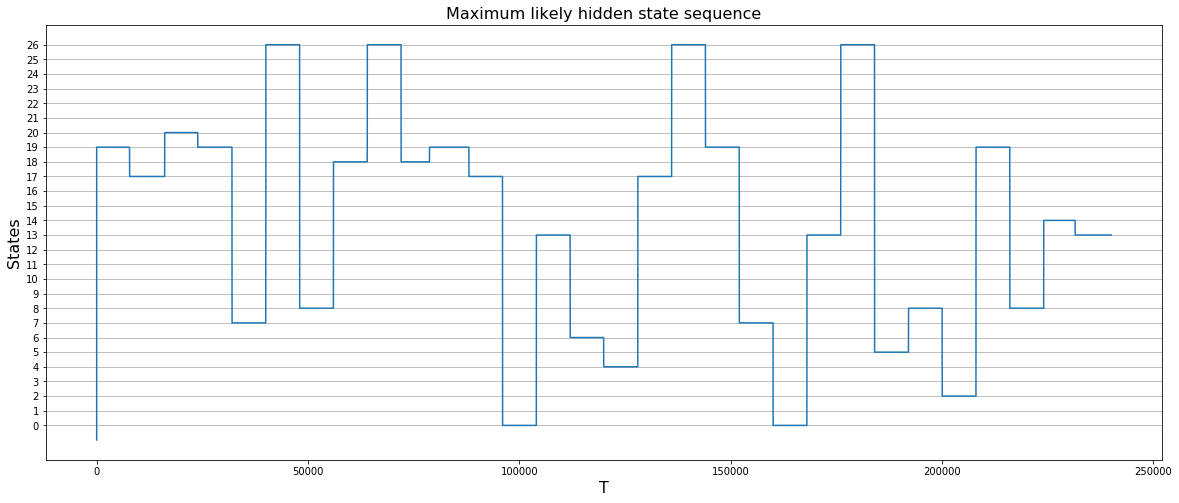

In [149]:
from matplotlib import pyplot as plt
import string

plt.figure(figsize=(20,8))
plt.plot([s for s in reversed(S[0])])
plt.title('Maximum likely hidden state sequence',fontsize=16)
plt.yticks([i for i in range(len(B))])
plt.xlabel('T', fontsize=16)
plt.ylabel('States', fontsize=16)
plt.grid(True,axis='y')
plt.show()

In [150]:
letters = [s for s in string.ascii_uppercase]
letters.append(' ')

for s in S:
    printstate = -1
    sentence = ''
    for state in reversed(s):
        if printstate != state: 
            sentence += letters[state]
            printstate = state
    print "MOST LIKELY SENTENCE ",S.index(s)," = ",sentence

MOST LIKELY SENTENCE  0  =  TRUTH IS STRANGER THAN FICTION
MOST LIKELY SENTENCE  1  =  TRUTH IS STRANGER THAN FICTIONA
MOST LIKELY SENTENCE  2  =  TRUTH IS STRANGER THAN FICTIONB
MOST LIKELY SENTENCE  3  =  TRUTH IS STRANGER THAN FICTIONC
MOST LIKELY SENTENCE  4  =  TRUTH IS STRANGER THAN FICTIOND
MOST LIKELY SENTENCE  5  =  TRUTH IS STRANGER THAN FICTIONE
MOST LIKELY SENTENCE  6  =  TRUTH IS STRANGER THAN FICTIONF
MOST LIKELY SENTENCE  7  =  TRUTH IS STRANGER THAN FICTIONG
MOST LIKELY SENTENCE  8  =  TRUTH IS STRANGER THAN FICTIONH
MOST LIKELY SENTENCE  9  =  TRUTH IS STRANGER THAN FICTIONO
MOST LIKELY SENTENCE  10  =  TRUTH IS STRANGER THAN FICTIONI
MOST LIKELY SENTENCE  11  =  TRUTH IS STRANGER THAN FICTIONP
MOST LIKELY SENTENCE  12  =  TRUTH IS STRANGER THAN FICTIONJ
MOST LIKELY SENTENCE  13  =  TRUTH IS STRANGER THAN FICTIONR
MOST LIKELY SENTENCE  14  =  TRUTH IS STRANGER THAN FICTIONQ
MOST LIKELY SENTENCE  15  =  TRUTH IS STRANGER THAN FICTIONK
MOST LIKELY SENTENCE  16  =  TRUTH 